<a href="https://colab.research.google.com/github/Startledkitten/DAA_Kelompok5/blob/main/DAAPertemuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Fibbonaci dengan while
nterms = int(input("How many terms? "))
n1, n2 = 0, 1
count = 0

if nterms <= 0:
    print("Please enter a positive integer")
elif nterms == 1:
    print("Fibonacci sequence upto ",nterms,":")
    print(n1)
else:
    print("Fibonacci sequence:")
    while count < nterms:
        print(n1) # Print n1 inside the loop
        nth = n1 + n2
        #update nilai
        n1 = n2
        n2 = nth
        count += 1

How many terms? 5
Fibonacci sequence:
0
1
1
2
3


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import itertools

#Try All Tours (exact_TSP)
def exact_TSP(cities):
    "Generate all possible tours of the cities and choose the shortest one."
    return shortest(alltours(cities))

def shortest(tours):
    "Return the tour with the minimum total distance."
    return min(tours, key=total_distance)



In [ ]:
#Representing Tours
alltours = itertools.permutations # The permutation function is already defined in the itertools module

cities = {1, 2, 3}

list(alltours(cities))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [ ]:
#Representing Cities and Distance
def total_distance(tour):
    "The total distance between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) for i in range(len(tour)))

In [ ]:
City = complex # Constructor for new cities, e.g. City(300, 400)

def distance(A, B):
    "The distance between two points."
    return abs(A - B)

In [ ]:
A = City(300, 0)
B = City(0, 400)
distance(A, B)

500.0

In [ ]:
def Cities(n):
    "Make a set of n cities, each with random coordinates."
    return set(City(random.randrange(10, 890), random.randrange(10, 590)) for c in range(n))

# Let's make some standard sets of cities of various sizes.
# We'll set the random seed so that these sets are the same every time we run this notebook.
random.seed('seed')
cities8, cities10, cities100, cities1000 = Cities(8), Cities(10), Cities(100), Cities(1000)
cities8

{(151+70j),
 (252+365j),
 (303+506j),
 (498+96j),
 (54+361j),
 (551+542j),
 (684+435j),
 (800+430j)}

In [ ]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

((551+542j), (684+435j), (800+430j), (498+96j), (151+70j), (54+361j), (252+365j), (303+506j))
1990.3883723135523


In [ ]:
#Try All Non-Redundant Tours
def alltours(cities):
    "Return a list of tours, each a permutation of cities, but each one starting with the same city."
    start = first(cities)
    return [[start] + list(tour)
            for tour in itertools.permutations(cities - {start})]

def first(collection):
    "Start iterating over collection, and return the first element."
    for x in collection: return x

In [ ]:
alltours({1, 2, 3})

[[1, 2, 3], [1, 3, 2]]

In [ ]:
alltours({1, 2, 3, 4})

[[1, 2, 3, 4],
 [1, 2, 4, 3],
 [1, 3, 2, 4],
 [1, 3, 4, 2],
 [1, 4, 2, 3],
 [1, 4, 3, 2]]

In [ ]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

[(551+542j), (684+435j), (800+430j), (498+96j), (151+70j), (54+361j), (252+365j), (303+506j)]
1990.3883723135523


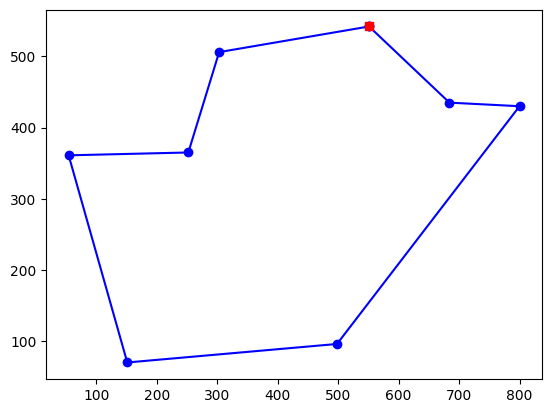

8 city tour; total distance = 1990.4; time = 0.022 secs for exact_TSP


In [ ]:
#Plotting
import time

def plot_tour(algorithm, cities):
    "Apply a TSP algorithm to cities, and plot the resulting tour."
    # Find the solution and time how long it takes
    t0 = time.time()
    tour = algorithm(cities)
    t1 = time.time()
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    plotline(list(tour) + [tour[0]])
    plotline([tour[0]], 'rs')
    plt.show()
    print("{} city tour; total distance = {:.1f}; time = {:.3f} secs for {}".format(
          len(tour), total_distance(tour), t1-t0, algorithm.__name__))

def plotline(points, style='bo-'):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    plt.plot(X, Y, style)

def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

plot_tour(exact_TSP, cities8)

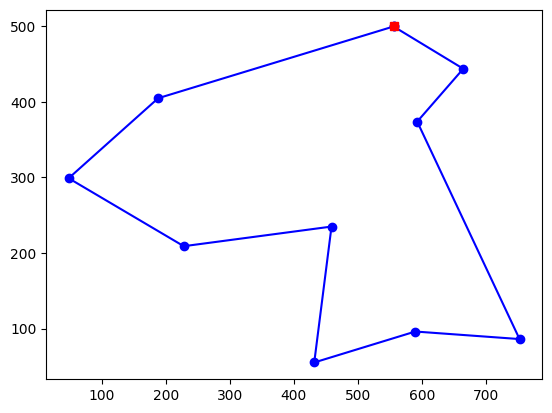

10 city tour; total distance = 2050.3; time = 2.466 secs for exact_TSP


In [ ]:
plot_tour(exact_TSP, cities10)

In [ ]:
#Greedy Nearest Neighbor (greedy_TSP)
def greedy_TSP(cities):
    "At each step, visit the nearest neighbor that is still unvisited."
    start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    return min(cities, key=lambda x: distance(x, A))

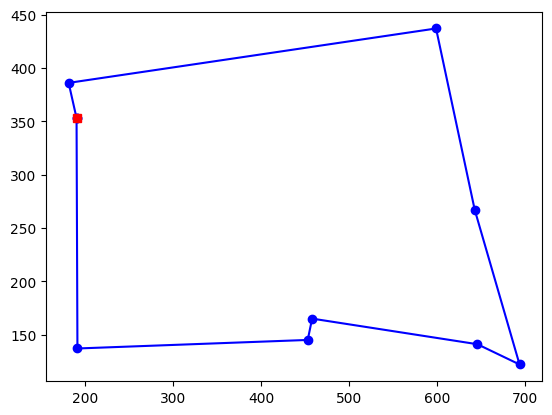

9 city tour; total distance = 1524.5; time = 0.125 secs for exact_TSP


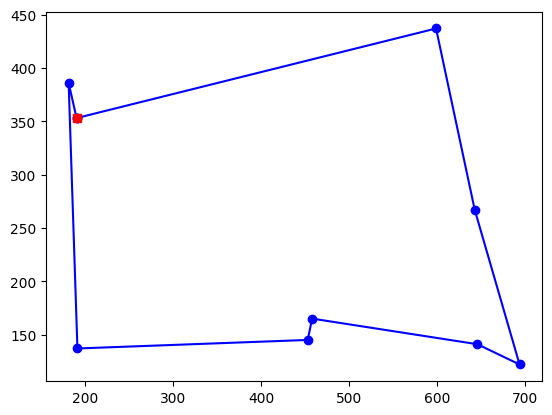

9 city tour; total distance = 1554.1; time = 0.000 secs for greedy_TSP


In [ ]:
cities = Cities(9)
plot_tour(exact_TSP, cities)
plot_tour(greedy_TSP, cities)

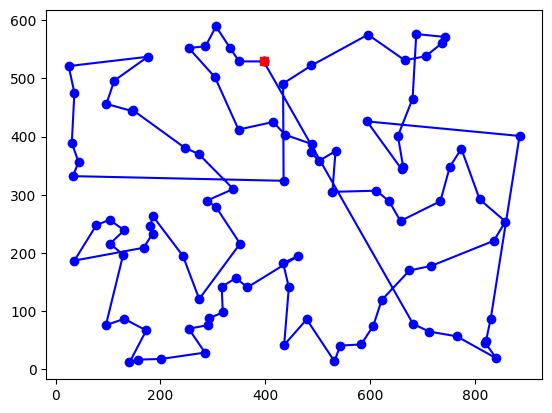

100 city tour; total distance = 6987.7; time = 0.003 secs for greedy_TSP


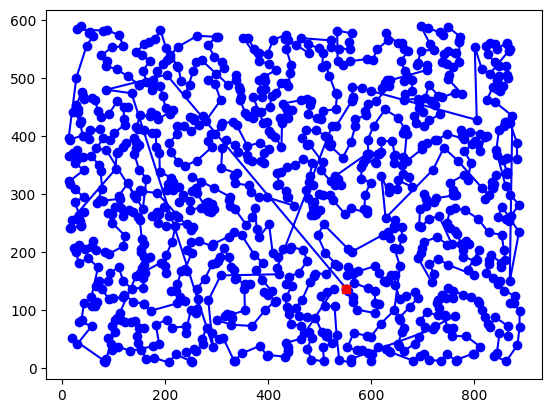

1000 city tour; total distance = 20529.4; time = 0.235 secs for greedy_TSP


In [ ]:
plot_tour(greedy_TSP, cities100)
plot_tour(greedy_TSP, cities1000)

In [ ]:
#Greedy Nearest Neighbor (greedy_TSP)
def greedy_TSP(cities):
    "At each step, visit the nearest neighbor that is still unvisited."
    start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    return min(cities, key=lambda x: distance(x, A))

In [ ]:
#Algorithm 3: Greedy Nearest Neighbor from All Starting Points (all_greedy_TSP)
def all_greedy_TSP(cities):
    "Try the greedy algorithm from each of the starting cities; return the shortest tour."
    return shortest(greedy_TSP(cities, start=c) for c in cities)

# We will modify greedy_TSP to take an optional start city; otherwise it is unchanged.

def greedy_TSP(cities, start=None):
    "At each step, visit the nearest neighbor that is still unvisited."
    if start is None: start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

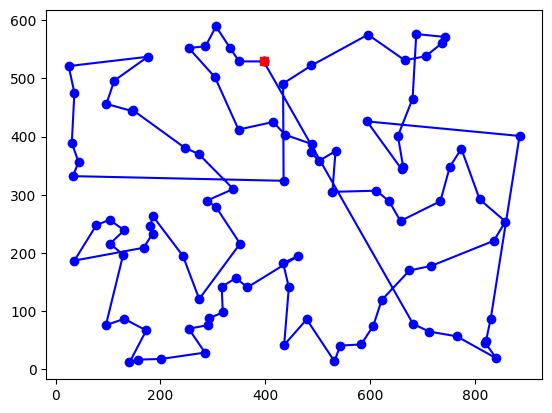

100 city tour; total distance = 6987.7; time = 0.001 secs for greedy_TSP


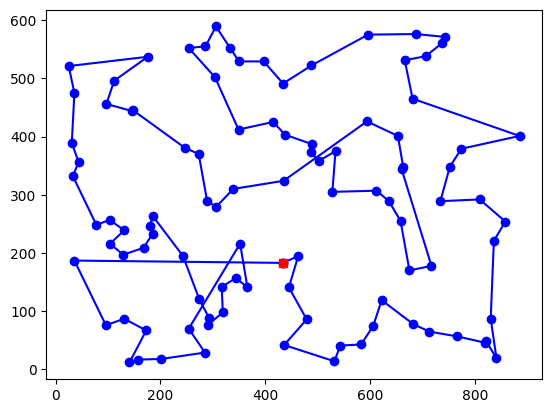

100 city tour; total distance = 6213.5; time = 0.137 secs for all_greedy_TSP


In [ ]:
# Compare greedy_TSP to all_greedy_TSP
plot_tour(greedy_TSP, cities100)
plot_tour(all_greedy_TSP, cities100)

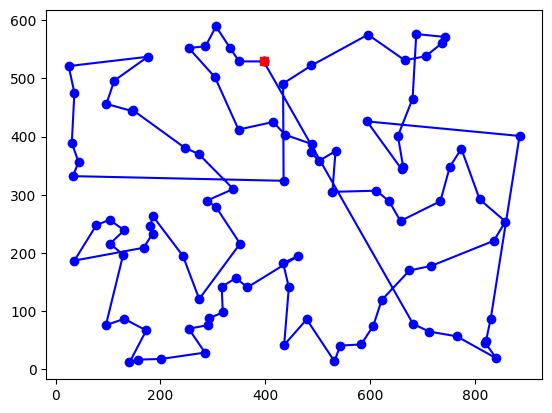

100 city tour; total distance = 6987.7; time = 0.005 secs for greedy_TSP


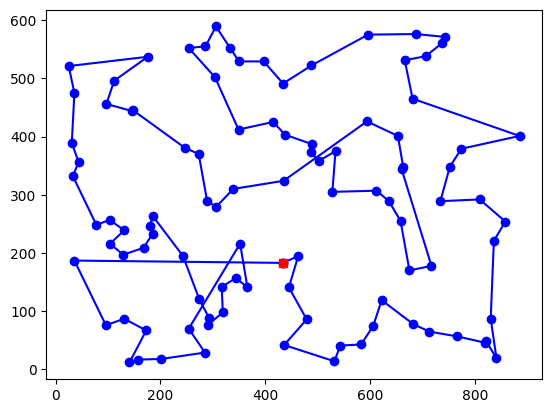

100 city tour; total distance = 6213.5; time = 0.264 secs for all_greedy_TSP


In [ ]:
# Compare greedy_TSP to all_greedy_TSP
plot_tour(greedy_TSP, cities100)
plot_tour(all_greedy_TSP, cities100)

In [ ]:
#Algorithm 4: Greedy Nearest Neighbor with Exact End (greedy_exact_end_TSP)
def greedy_exact_end_TSP(cities, start=None, end_size=8):
    """At each step, visit the nearest neighbor that is still unvisited until
    there are k_end cities left; then choose the best of all possible endings."""
    if start is None: start = first(cities)
    tour = [start]
    unvisited = cities - {start}

    # Use greedy algorithm for all but the last end_size cities
    while len(unvisited) > end_size:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)

    # Consider all permutations of possible ends to the tour, and choose the best one.
    # (But to make things faster, omit the middle of the tour.)
    ends = map(list, itertools.permutations(unvisited))
    best = shortest([tour[0], tour[-1]] + end for end in ends)
    return tour + best[2:]

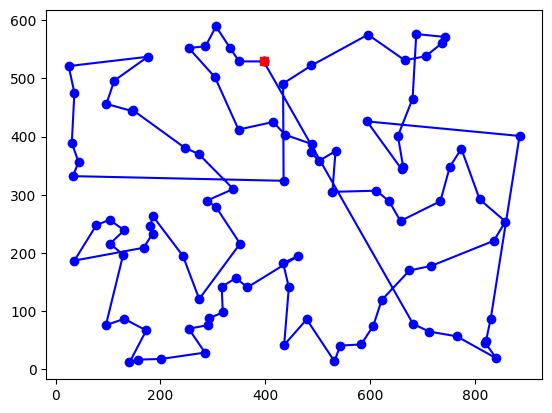

100 city tour; total distance = 6987.7; time = 0.147 secs for greedy_exact_end_TSP


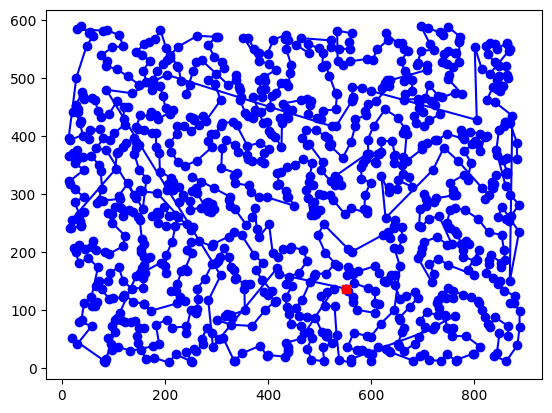

1000 city tour; total distance = 20171.0; time = 0.254 secs for greedy_exact_end_TSP


In [ ]:
plot_tour(greedy_exact_end_TSP, cities100)
plot_tour(greedy_exact_end_TSP, cities1000)

In [ ]:
def greedy_bi_TSP(cities, start_size=12, end_size=6):
    "At each step, visit the nearest neighbor that is still unvisited."
    starts = random.sample(list(cities), min(len(cities), start_size))
    return shortest(greedy_exact_end_TSP(cities, start, end_size)
                    for start in starts)

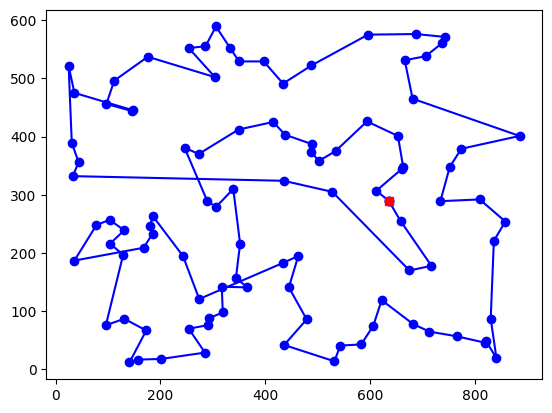

100 city tour; total distance = 6230.0; time = 0.042 secs for greedy_bi_TSP


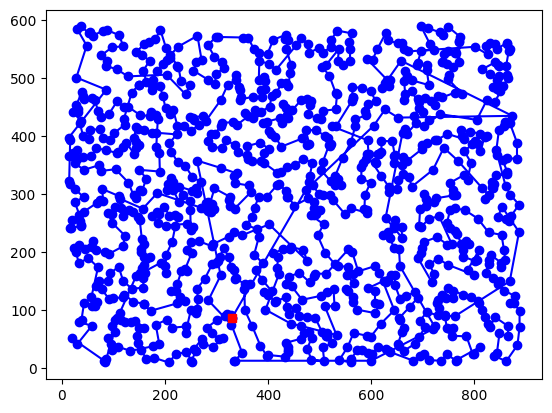

1000 city tour; total distance = 20070.7; time = 2.693 secs for greedy_bi_TSP


In [ ]:
random.seed('bi')
plot_tour(greedy_bi_TSP, cities100)
plot_tour(greedy_bi_TSP, cities1000)

In [ ]:
#Benchmarking Algorithms
def compare_algorithms(algorithms, maps):
    "Apply each algorithm to each map and plot results."
    for algorithm in algorithms:
        t0 = time.time()
        results = [total_distance(algorithm(m)) for m in maps]
        t1 = time.time()

        avg = sum(results) / len(results)
        label = '{:.0f}; {:.1f}s: {}'.format(avg, t1-t0, algorithm.__name__)
        plt.plot(sorted(results), label=label)
    plt.legend(loc=2)
    plt.show()
    print('{} x {}-city maps'.format(len(maps), len(maps[0])))

def Maps(M, N):
    "Return a list of M maps, each consisting of a set of N cities."
    return [Cities(N) for m in range(M)]

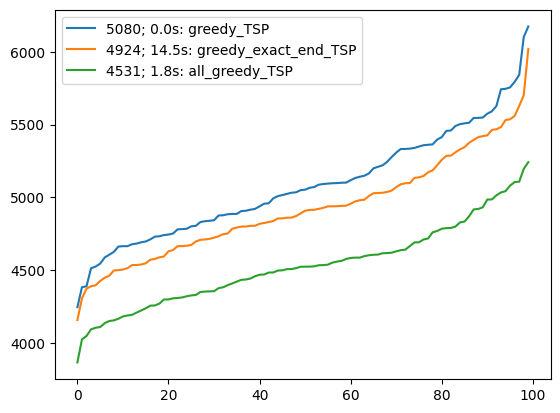

100 x 50-city maps


In [ ]:
compare_algorithms([greedy_TSP, greedy_exact_end_TSP, all_greedy_TSP], Maps(100, 50))

In [ ]:
def bi_10_6(cities): return greedy_bi_TSP(cities, 10, 6)
def bi_20_5(cities): return greedy_bi_TSP(cities, 20, 5)
def bi_40_4(cities): return greedy_bi_TSP(cities, 40, 4)
def bi_80_2(cities): return greedy_bi_TSP(cities, 80, 2)
def bi_160_1(cities): return greedy_bi_TSP(cities, 160, 1)

algorithms = [bi_10_6, bi_20_5, bi_40_4, bi_80_2, bi_160_1]

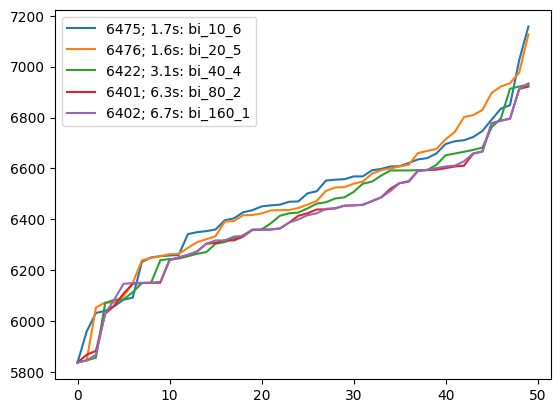

50 x 100-city maps


In [ ]:
compare_algorithms(algorithms, Maps(50, 100))

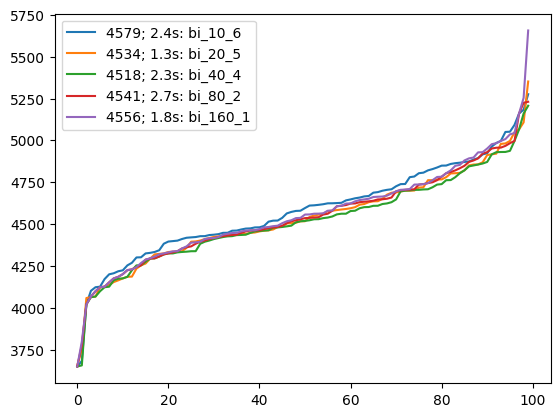

100 x 50-city maps


In [ ]:
compare_algorithms(algorithms, Maps(100, 50))

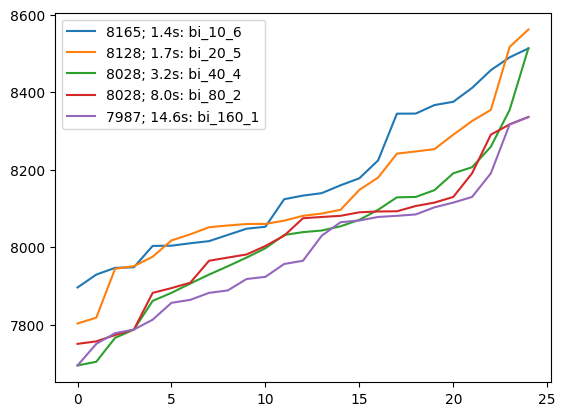

25 x 160-city maps


In [ ]:
compare_algorithms(algorithms, Maps(25, 160))

In [ ]:
string = 'BCAADDDCCACACAC'

# Creating tree nodes
class NodeTree(object):

    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return (self.left, self.right)

    def nodes(self):
        return (self.left, self.right)

    def __str__(self):
        return '%s_%s' % (self.left, self.right)

In [ ]:
# Main function implementing huffman coding
def huffman_code_tree(node, left=True, binString=''):
    if type(node) is str:
        return {node: binString}
    (l, r) = node.children()
    d = dict()
    d.update(huffman_code_tree(l, True, binString + '0'))
    d.update(huffman_code_tree(r, False, binString + '1'))
    return d

In [ ]:
# Calculating frequency
freq = {}
for c in string:
    if c in freq:
        freq[c] += 1
    else:
        freq[c] = 1

freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
nodes = freq

while len(nodes) > 1:
    (key1, c1) = nodes[-1]
    (key2, c2) = nodes[-2]
    nodes = nodes[:-2]
    node = NodeTree(key1, key2)
    nodes.append((node, c1 + c2))

    nodes = sorted(nodes, key=lambda x: x[1], reverse=True)

huffmanCode = huffman_code_tree(nodes[0][0])

print(' Char | Huffman code ')
print('--------------------')
for (char, frequency) in freq:
    print(' %-4r |%12s' % (char, huffmanCode[char]))

 Char | Huffman code 
--------------------
 'C'  |           0
 'A'  |          11
 'D'  |         101
 'B'  |         100


In [ ]:
# 1
# A Huffman Tree Node
import heapq

class node:
    def __init__(self, freq, symbol, left=None, right=None):
        # frequency of symbol
        self.freq = freq

        # symbol name (character)
        self.symbol = symbol

        # node left of current node
        self.left = left

        # node right of current node
        self.right = right

        # tree direction (0/1)
        self.huff = ''

    def __lt__(self, nxt):
        return self.freq < nxt.freq

In [ ]:
# 2
# utility function to print huffman
# codes for all symbols in the newly
# created Huffman tree
def printNodes(node, val=''):

    # huffman code for current node
    newVal = val + str(node.huff)

    # if node is not an edge node
    # then traverse inside it
    if(node.left):
        printNodes(node.left, newVal)
    if(node.right):
        printNodes(node.right, newVal)

    # if node is edge node then
    # display its huffman code
    if(not node.left and not node.right):
        print(f"{node.symbol} -> {newVal}")

In [ ]:
# 3
# characters for huffman tree
chars = ['a', 'b', 'c', 'd', 'e', 'f']

# frequency of characters
freq = [5, 9, 12, 13, 16, 45]

# list containing unused nodes
nodes = []

# converting characters and frequencies
# into huffman tree nodes
for x in range(len(chars)):
    heapq.heappush(nodes, node(freq[x], chars[x]))

In [ ]:
# 4
while len(nodes) > 1:
    # sort all the nodes in ascending order
    # based on their frequency
    left = heapq.heappop(nodes)
    right = heapq.heappop(nodes)

    # assign directional value to these nodes
    left.huff = 0
    right.huff = 1

    # combine the 2 smallest nodes to create
    # new node as their parent
    newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right)

    heapq.heappush(nodes, newNode)

# Huffman Tree is ready!
printNodes(nodes[0])

f -> 0
c -> 100
d -> 101
a -> 1100
b -> 1101
e -> 111
